In [2]:
pip install sktime

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeClassifierCV
from sktime.transformations.panel.rocket import MiniRocket
from sktime.transformations.panel.rocket import Rocket
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
cat_train=pd.read_csv('RavdessAudioOnlyNumpy__Y_train.csv')
cat_test=pd.read_csv('RavdessAudioOnlyNumpy__Y_test.csv')

In [4]:
y_train=cat_train['emotion']
y_test=cat_test['emotion']

In [5]:
le=LabelEncoder()
y_trainEncoded=le.fit_transform(y_train)
y_testEncoded=le.fit_transform(y_test)

In [5]:
x_train_dft=np.load('X_train_dft.npy')
x_test_dft=np.load('x_test_dtf.npy')

In [7]:
x_train=np.load('RavdessAudioOnlyNumpy__X_train.npy')
x_test=np.load('RavdessAudioOnlyNumpy__X_test.npy')

In [8]:
x_train=np.nan_to_num(x_train)
x_test=np.nan_to_num(x_test)

In [42]:
x_test_dft.shape

(624, 64)

In [6]:
## let's try to embed the 64 timestamps into a single one
# Reshape the array to (1828, 1) and embed the values in a series or tuple
#embedded_array = np.array([tuple(row) for row in x_train_dft.reshape(1828, 64)])

x_train_dftEmb=x_train_dft.reshape(1828,1,64)
x_test_dftEmb=x_test_dft.reshape(624,1,64)



In [7]:
rocket = Rocket(num_kernels=1000)
rocket.fit(x_train_dftEmb)
X_train_transform = rocket.transform(x_train_dftEmb)
X_test_transform = rocket.transform(x_test_dftEmb)

In [25]:
clf_R=RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True) 
clf_R.fit(X_train_transform, y_train)

RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                  normalize=True)

In [28]:
print(classification_report(y_test, clf_R.predict(X_test_transform)))

              precision    recall  f1-score   support

       angry       0.31      0.33      0.32        96
        calm       0.33      0.82      0.47        96
     disgust       0.33      0.02      0.04        48
     fearful       0.28      0.20      0.23        96
       happy       0.18      0.19      0.18        96
     neutral       0.00      0.00      0.00        48
         sad       0.20      0.19      0.19        96
   surprised       0.15      0.04      0.07        48

    accuracy                           0.27       624
   macro avg       0.22      0.22      0.19       624
weighted avg       0.24      0.27      0.22       624



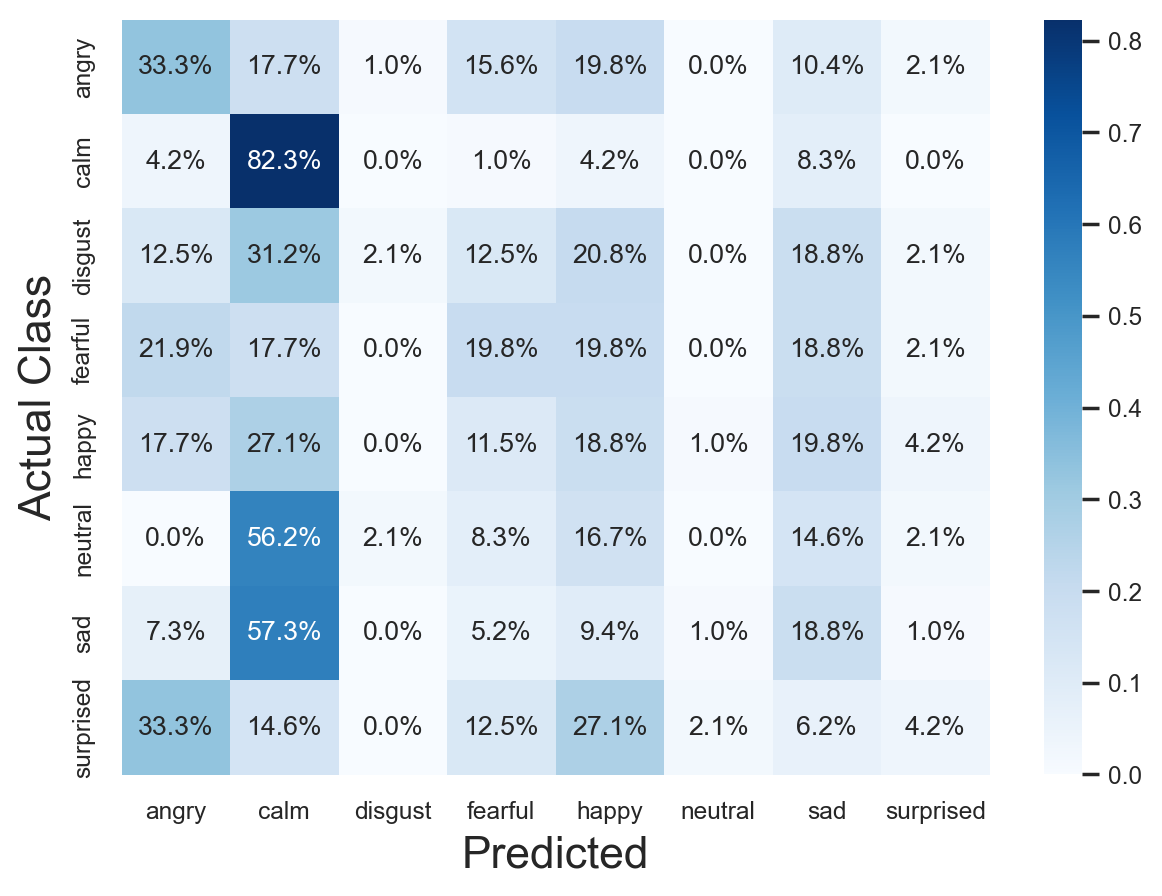

In [31]:
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams['figure.dpi']=200
emo_labels=['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
sns.set(font_scale=0.8)
conf_m= confusion_matrix(y_test, clf_R.predict(X_test_transform), normalize='true')
sns.heatmap(conf_m, annot=True, xticklabels=emo_labels, yticklabels=emo_labels, fmt='.1%',cmap='Blues' )
plt.xlabel("Predicted", fontsize=16)
plt.ylabel("Actual Class", fontsize=16)
plt.show()
    

### ROCKET pipeline

In [7]:
train_accR=[]
test_accR=[]

i=1
for kernels in np.linspace(10,10000,25):
    rocket=Rocket(num_kernels=kernels)
    rocket.fit(x_train_dftEmb)
    print(f'{i}/25 rocket fit done                 {kernels} kernels')
    X_trainsformR=rocket.transform(x_train_dftEmb)
    X_testformR=rocket.transform(x_test_dftEmb)
    print(f'{i}/25 rocket transformations done')
    clf_R=RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True) 
    clf_R.fit(X_trainsformR, y_train)
    print(f'{i}/25 model fit done')
    train_accR.append(accuracy_score(y_test, clf_R.predict(X_testformR)))
    test_accR.append(accuracy_score(y_train,clf_R.predict(X_trainsformR)))
    print(f'{i}/25 results appending done\n---------------------------------------------------')
    i+=1


1/25 rocket fit done                 10.0 kernels
1/25 rocket transformations done
1/25 model fit done
1/25 results appending done
---------------------------------------------------
2/25 rocket fit done                 426.25 kernels
2/25 rocket transformations done
2/25 model fit done
2/25 results appending done
---------------------------------------------------
3/25 rocket fit done                 842.5 kernels
3/25 rocket transformations done
3/25 model fit done
3/25 results appending done
---------------------------------------------------
4/25 rocket fit done                 1258.75 kernels
4/25 rocket transformations done
4/25 model fit done
4/25 results appending done
---------------------------------------------------
5/25 rocket fit done                 1675.0 kernels
5/25 rocket transformations done
5/25 model fit done
5/25 results appending done
---------------------------------------------------
6/25 rocket fit done                 2091.25 kernels
6/25 rocket transformati

In [ ]:
from sktime.transformations.panel.rocket import MiniRocket

In [8]:
kernel=list(np.linspace(10,10000,25))
kernel

[10.0,
 426.25,
 842.5,
 1258.75,
 1675.0,
 2091.25,
 2507.5,
 2923.75,
 3340.0,
 3756.25,
 4172.5,
 4588.75,
 5005.0,
 5421.25,
 5837.5,
 6253.75,
 6670.0,
 7086.25,
 7502.5,
 7918.75,
 8335.0,
 8751.25,
 9167.5,
 9583.75,
 10000.0]

In [9]:
my_kernels=[int(el) for el in kernel]
my_kernels

[10,
 426,
 842,
 1258,
 1675,
 2091,
 2507,
 2923,
 3340,
 3756,
 4172,
 4588,
 5005,
 5421,
 5837,
 6253,
 6670,
 7086,
 7502,
 7918,
 8335,
 8751,
 9167,
 9583,
 10000]

In [10]:
train_accMR =[0]
test_accMR=[0]

i=1
for k in my_kernels[1:]:
    minirocket=MiniRocket(num_kernels=k)
    minirocket.fit(x_train_dftEmb)
    print(f'{i}/25 minirocket fit done                      {k} kernels')
    
    X_trainsformMR=minirocket.transform(x_train_dftEmb)
    X_testformMR=minirocket.transform(x_test_dftEmb)
    print(f'{i}/25 minirocket transformations done')
    
    clf_MR=RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True) 
    clf_MR.fit(X_trainsformMR, y_train)
    print(f'{i}/25 model fit done')
    
    test_accMR.append(accuracy_score(y_test, clf_MR.predict(X_testformMR)))
    train_accMR.append(accuracy_score(y_train,clf_MR.predict(X_trainsformMR)))
    print(f'{i}/25 results appending done\n---------------------------------------------------')
    i+=1


1/25 minirocket fit done                      426 kernels
1/25 minirocket transformations done
1/25 model fit done
1/25 results appending done
---------------------------------------------------
2/25 minirocket fit done                      842 kernels
2/25 minirocket transformations done
2/25 model fit done
2/25 results appending done
---------------------------------------------------
3/25 minirocket fit done                      1258 kernels
3/25 minirocket transformations done
3/25 model fit done
3/25 results appending done
---------------------------------------------------
4/25 minirocket fit done                      1675 kernels
4/25 minirocket transformations done
4/25 model fit done
4/25 results appending done
---------------------------------------------------
5/25 minirocket fit done                      2091 kernels
5/25 minirocket transformations done
5/25 model fit done
5/25 results appending done
---------------------------------------------------
6/25 minirocket fit do

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

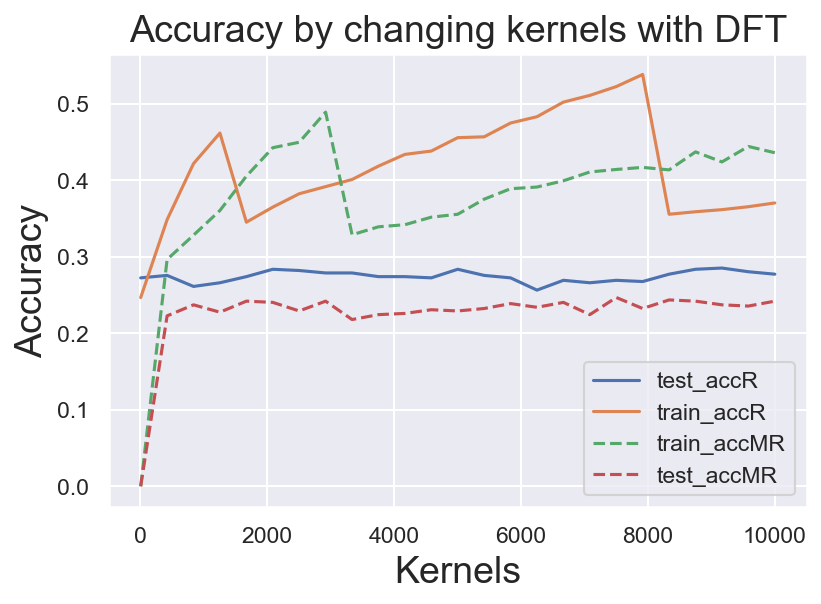

In [12]:
## train acc actually contains test values and viceversa

plt.rcParams['figure.dpi']=150
sns.set()
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.plot(my_kernels,train_accR, label='test_accR')
plt.plot(my_kernels,test_accR, label='train_accR')
plt.plot(my_kernels,train_accMR, label='train_accMR' , linestyle="--")
plt.plot(my_kernels, test_accMR, label='test_accMR', linestyle="--")
plt.xlabel('Kernels', )
plt.ylabel('Accuracy')
plt.title('Accuracy by changing kernels with DFT')
plt.legend()

In [75]:
x_train_dftEmb.shape

(1828, 1, 64)

In [49]:
print(X_train_transform.shape, y_train.shape)

(1828, 2000) (1828,)


possible things to do:
- also try random forest as classifier
- try decision tree
- try different kernel values in Rocket, they lead to dfferent number of features. It assigns 2 features per kernel. 
- 

In [50]:
classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True) 
classifier.fit(X_train_transform, y_train) 

RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                  normalize=True)

In [51]:
X_test_transform = rocket.transform(x_test_dftEmb)

In [53]:

y_pred = classifier.predict(X_test_transform)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.33      0.38      0.35        96
        calm       0.32      0.76      0.45        96
     disgust       0.00      0.00      0.00        48
     fearful       0.28      0.18      0.22        96
       happy       0.21      0.26      0.23        96
     neutral       0.00      0.00      0.00        48
         sad       0.21      0.21      0.21        96
   surprised       0.22      0.04      0.07        48

    accuracy                           0.28       624
   macro avg       0.20      0.23      0.19       624
weighted avg       0.23      0.28      0.23       624



In [14]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf= RandomForestClassifier()
rf.fit(X_train_transform, y_train)

RandomForestClassifier()

In [55]:
print(classification_report(y_test, rf.predict(X_test_transform)))

              precision    recall  f1-score   support

       angry       0.26      0.30      0.28        96
        calm       0.34      0.73      0.47        96
     disgust       0.00      0.00      0.00        48
     fearful       0.31      0.28      0.30        96
       happy       0.21      0.21      0.21        96
     neutral       0.00      0.00      0.00        48
         sad       0.16      0.18      0.17        96
   surprised       0.20      0.04      0.07        48

    accuracy                           0.26       624
   macro avg       0.19      0.22      0.19       624
weighted avg       0.21      0.26      0.22       624



In [15]:
y_train.value_counts()

calm         280
happy        280
sad          280
angry        280
fearful      280
disgust      144
surprised    144
neutral      140
Name: emotion, dtype: int64

In [21]:
clf_tree=DecisionTreeClassifier()
clf_tree.fit(X_train_transform, y_train)
y_pred_tree=clf_tree.predict(X_test_transform)
print(classification_report(y_testEncoded, y_pred))

              precision    recall  f1-score   support

           0       0.15      1.00      0.27        96
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        96
           7       0.00      0.00      0.00        48

    accuracy                           0.15       624
   macro avg       0.02      0.12      0.03       624
weighted avg       0.02      0.15      0.04       624



In [23]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

In [24]:
knn=KNeighborsTimeSeriesClassifier()
knn.fit(x_train_dft, y_trainEncoded)


KNeighborsTimeSeriesClassifier()

In [25]:
print(classification_report(y_testEncoded,knn.predict(x_test_dft)))

              precision    recall  f1-score   support

           0       0.18      0.14      0.16        96
           1       0.26      0.29      0.28        96
           2       0.10      0.10      0.10        48
           3       0.26      0.22      0.24        96
           4       0.22      0.23      0.22        96
           5       0.12      0.12      0.12        48
           6       0.10      0.10      0.10        96
           7       0.16      0.21      0.18        48

    accuracy                           0.18       624
   macro avg       0.18      0.18      0.18       624
weighted avg       0.19      0.18      0.18       624



## MINIROCKET

In [79]:
miniR=MiniRocket(num_kernels=1000)
miniR.fit(x_train_dftEmb) 
X_train_trans_mini=miniR.transform(x_train_dftEmb)
X_test_trans_mini=miniR.transform(x_test_dftEmb)


In [80]:
X_test_trans_mini.shape

(624, 924)

In [81]:
rf.fit(X_train_trans_mini, y_train)
print(classification_report(y_test, rf.predict(X_test_trans_mini)))

              precision    recall  f1-score   support

       angry       0.33      0.21      0.25        96
        calm       0.27      0.62      0.38        96
     disgust       0.13      0.15      0.14        48
     fearful       0.15      0.07      0.10        96
       happy       0.17      0.15      0.16        96
     neutral       0.00      0.00      0.00        48
         sad       0.16      0.17      0.16        96
   surprised       0.22      0.25      0.24        48

    accuracy                           0.22       624
   macro avg       0.18      0.20      0.18       624
weighted avg       0.19      0.22      0.19       624



In [57]:
from sktime.classification.interval_based import CanonicalIntervalForest

In [ ]:
cif= CanonicalIntervalForest()
cif.fit(x_train_dftEmb, y_train)

In [ ]:
print(classification_report(y_test, cif.predict(x_test_dftEmb)))